# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print ("loading complete!")

Loading MNIST dataset...
loading complete!


## Part 2: Implement SVD for Dimensionality Reduction

In [4]:
def apply_svd_custom(X_train, X_test, n_components):
    covariance_matrix = np.dot(X_train.T, X_train) #use the dot product to get the covariance  matrix

    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix) #solve for eigens
    
    i = np.argsort(eigenvalues)[::-1]
    ev = eigenvalues[i]
    eg = eigenvectors[:, i]
    
    
    topeg= eg[:, :n_components]
    
  #projection
    X_train_reduced = np.dot(X_train, topeg)
    X_test_reduced = np.dot(X_test, topeg)
    
    return X_train_reduced, X_test_reduced

## Part 3: Train Logistic Regression and Measure Performance

In [5]:
def train_logistic_regression(X_train, y_train, X_test, y_test):
    # Logistic regression model without specifying 'multi_class'
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42)
    
    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    # Predict on test data and calculate accuracy
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [6]:
svd_components = [784] 
results = []

print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"\nApplying custom SVD with {n_components} components...")
    X_train_svd, X_test_svd = apply_svd_custom(X_train, X_test, n_components)
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)
    results.append({
        "n_components": n_components,
        "accuracy": accuracy,
        "training_time": training_time
    })
    print("finished")   
    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")


Training models with different levels of SVD preprocessing...

Applying custom SVD with 784 components...
finished
SVD components: 784, Accuracy: 0.9209, Training time: 5776.9773 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


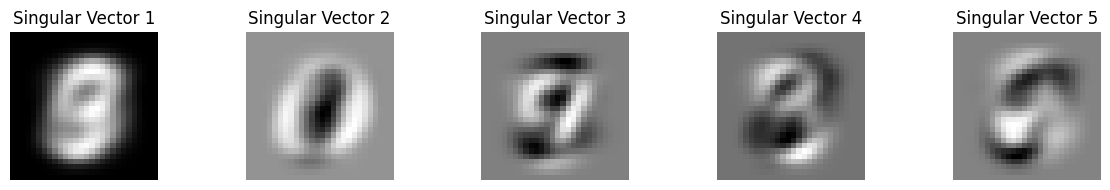

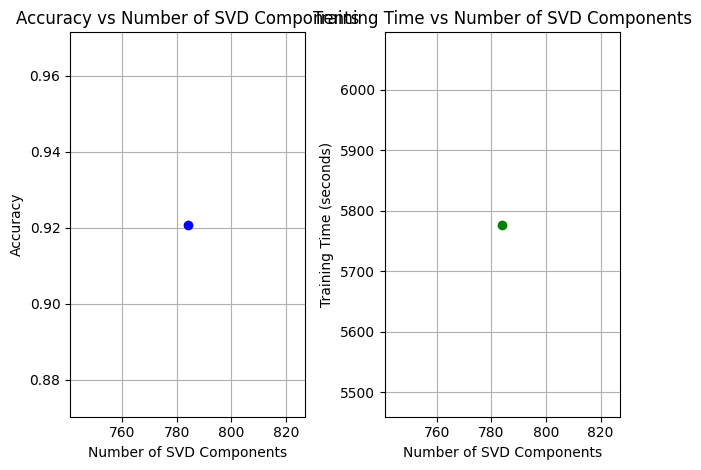

finished


In [9]:
# Convert X_train to a NumPy array before reshaping
X_train_np = X_train.to_numpy()

# Ensure the input is flattened
X_train_np = X_train_np.reshape(-1, 28 * 28)

# Apply SVD
U, S, Vt = np.linalg.svd(X_train_np, full_matrices=False)

# Visualize the top 5 right singular vectors (Vt)
plt.figure(figsize=(12, 2))
for i in range(5):
    # Vt contains the right singular vectors, and each row corresponds to a singular vector
    singular_vector = Vt[i, :]  # Select the i-th singular vector
    plt.subplot(1, 5, i + 1)
    plt.imshow(singular_vector.reshape(28, 28), cmap='gray')
    plt.title(f'Singular Vector {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(svd_components, accuracy, marker='o', color='blue')
plt.title('Accuracy vs Number of SVD Components')
plt.xlabel('Number of SVD Components')
plt.ylabel('Accuracy')
plt.grid(True)

# Plot Training Time
plt.subplot(1, 2, 2)
plt.plot(svd_components, training_time, marker='o', color='green')
plt.title('Training Time vs Number of SVD Components')
plt.xlabel('Number of SVD Components')
plt.ylabel('Training Time (seconds)')
plt.grid(True)

plt.tight_layout()
plt.show()

print("finished")

## Part 6: Analyze / Conclusion 

YOUR ANSWER: 

In [10]:
#the training time for 784 svd components is too long, it is almost two hours, 

In [ ]:
#but the accuracy is high enough